In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls

drive  sample_data


In [3]:
%cd ./drive/MyDrive/ProbML4TimeSeries/
#%cd ../ProbML4TimeSeries/

/content/drive/MyDrive/ProbML4TimeSeries


In [ ]:
!python run_sim.py --is_training 1 --model_id "test_wind_1_3" --example_name "Toy_Wind" --root_path '../data/Toy_wind/' --tail_factor_state 1.2 --seq_len_markov 36 --e_layers_markov 3

Args in experiment:
Namespace(is_training=1, model_id='test_wind_1_3', example_name='Toy_Wind', root_path='../data/Toy_wind/', freq='h', checkpoints='../checkpoints/', state_init_root_path='../data/wind_data_state_sim_300.pt', amount_init_root_path='../data/wind_data_amount_sim.pt', time_init_root_path='../data/wind_data_time_sim.pt', seq_len_markov=36, seq_len=48, label_len=48, pred_len=48, num_grps=300, tail_pct=0.3333333333333333, tail_factor_state=1.2, enc_in=6, d_model=512, n_heads=8, e_layers_markov=3, e_layers=4, d_layers=4, d_ff=2048, factor=7, distil=True, dropout=0.05, embed='timeF', activation='gelu', output_attention=False, num_workers=0, train_epochs=20, batch_size=256, patience=3, learning_rate=0.0001, des='exp', lradj='type2', use_gpu=True, gpu=0, use_multi_gpu=False, devices='0,1,2,3', dec_in=6, c_out=6)
Use GPU: cuda:0
Use GPU: cuda:0
>>>>>>>start training for Markov model: test_wind_1_3_Markov_Toy_Wind_ng300_sl36_dm512_nh8_el3_df2048_fc7_dtexp_0>>>>>>>>>>>>>>>>>>>>>>>

In [ ]:
#!python run_sim.py --is_training 0 --model_id "test_wind_12_24" --example_name "Toy_Wind" --root_path '../data/Toy_wind/' --tail_factor_state 1.2 --seq_len_markov 36 --e_layers_markov 3 --state_init_root_path '../data/Toy_wind/wind_data_state_sim_300.pt' --amount_init_root_path '../data/Toy_wind/wind_data_amount_sim.pt' --time_init_root_path '../data/Toy_wind/wind_data_time_sim.pt'

Args in experiment:
Namespace(is_training=0, model_id='test_wind_12_24', example_name='Toy_Wind', root_path='../data/Toy_wind/', freq='h', checkpoints='../checkpoints/', state_init_root_path='../data/Toy_wind/wind_data_state_sim_300.pt', amount_init_root_path='../data/Toy_wind/wind_data_amount_sim.pt', time_init_root_path='../data/Toy_wind/wind_data_time_sim.pt', seq_len_markov=36, seq_len=48, label_len=48, pred_len=48, num_grps=300, tail_pct=0.3333333333333333, tail_factor_state=1.2, enc_in=6, d_model=512, n_heads=8, e_layers_markov=3, e_layers=4, d_layers=4, d_ff=2048, factor=7, distil=True, dropout=0.05, embed='timeF', activation='gelu', output_attention=False, num_workers=0, train_epochs=20, batch_size=256, patience=3, learning_rate=0.0001, des='exp', lradj='type2', use_gpu=True, gpu=0, use_multi_gpu=False, devices='0,1,2,3', dec_in=6, c_out=6)
Use GPU: cuda:0
Use GPU: cuda:0
>>>>>>>simulation : test_wind_12_24_Informer_Toy_Wind_ng300_sl48_ll48_pl48_dm512_nh8_el4_dl4_df2048_fc7_dte

In [4]:
from utils.tools import dotdict
from exp.exp_main_sim import Exp_Main_Sim
from exp.exp_main_markov import Exp_Main_Markov
import torch
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

Step 1: Check the inference capability of the deep learning model by using the existing Markov state squence

In [5]:
args = dotdict()

args.model_id = 'test_wind_12_1'
args.model = 'Informer_sim'
args.example_name = "Toy_Wind"

args.root_path = '../data/Toy_wind/' # root path of data file
args.freq = 'h' # freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h
args.checkpoints = '../checkpoints' # location of model checkpoints

args.seq_len_markov = 36   # input sequence length of Informer encoder
args.tail_pct = 1/3 # percentage of Markov states in the tail region
args.tail_factor_state = 1.2 # weights to minority classes
args.seq_len = 24 * 2   # input sequence length of Informer encoder
args.label_len = 24 * 2  # start token length of Informer decoder
args.pred_len = 24 * 2 # prediction sequence length

args.num_grps = 300 # number of clusters
args.enc_in = 6 # encoder input size
args.dec_in = args.enc_in
args.c_out = args.enc_in
args.d_model = 512 # dimension of model
args.n_heads = 8 # num of heads
args.e_layers_markov = 3 # num of decoder layers for Markov state generation
args.e_layers = 4 # num of encoder layers
args.d_layers = 4 # num of decoder layers
args.d_ff = 2048 # dimension of fcn in model
args.factor = 7 # probsparse attn factor
args.padding = 0
args.distil = True # whether to use distilling in encoder
args.dropout = 0.05 # dropout
args.activation = 'gelu' # activation
args.output_attention = False # whether to output attention in ecoder

args.num_workers = 0
args.train_epochs = 20
args.batch_size = 128
args.patience = 3
args.learning_rate = 0.0001
args.des = 'exp'
args.lradj = 'type2' 

args.use_gpu = True if torch.cuda.is_available() else False
args.gpu = 0

In [ ]:
# Load the model
exp = Exp_Main_Sim(args)

if args.use_gpu:
  exp.model.load_state_dict(torch.load('../checkpoints/test_wind_12_24_Informer_Toy_Wind_ng300_sl48_ll48_pl48_dm512_nh8_el4_dl4_df2048_fc7_dtexp_0/checkpoint.pth'))
else:
  exp.model.load_state_dict(torch.load('../checkpoints/test_wind_12_24_Informer_Toy_Wind_ng300_sl48_ll48_pl48_dm512_nh8_el4_dl4_df2048_fc7_dtexp_0/checkpoint.pth', map_location=torch.device('cpu')))

Use GPU: cuda:0


In [ ]:
# Check the accuracy of the deep learning model for inferring x(t)
amount = torch.load('../data/Toy_wind/wind_data_amount.pt')
state = torch.load('../data/Toy_wind/wind_data_state_300.pt')
time = torch.load('../data/Toy_wind/wind_data_time.pt')
time_real = np.load('../data/Toy_wind/wind_data_time_real.npy', allow_pickle=True)

In [ ]:
dim_a = amount.shape
amount_sim = amount[:, :args.seq_len, :]
zeros_tail = torch.zeros(dim_a[0], dim_a[1] - args.seq_len, dim_a[2]).float()
amount_sim = torch.cat([amount_sim, zeros_tail], dim=1).float()

In [ ]:
from utils.simulation import simulate

amount_sim = simulate(exp, amount_sim, state, time)

<Figure size 640x480 with 0 Axes>

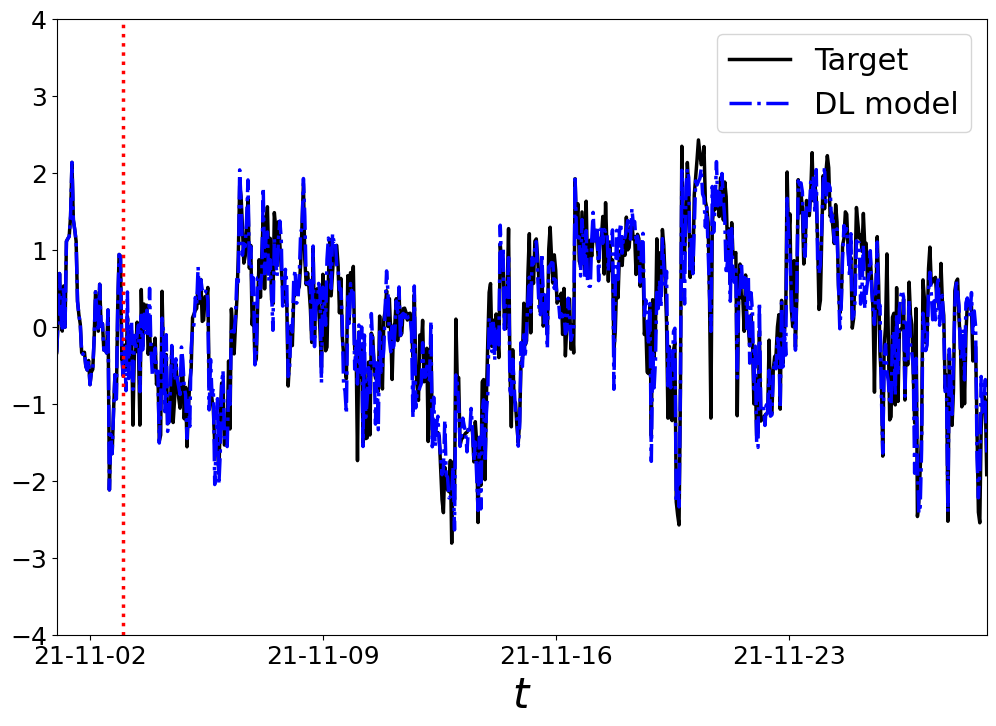

In [ ]:
# Time series plot: the last index 0 -> g1(t), 2 -> g3(t), 5 -> g6(t)
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import datetime

date_format = '%Y-%m-%dT%H:%M:%SZ'
true = amount[190, :, 2]
pred = amount_sim[190, :, 2]
t = time_real[190, :, 0]
t = [datetime.strptime(x, date_format) for x in t]
t_min = min(t)
t_max = max(t)

%matplotlib inline
plt.figure()
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(t, true, 'k-', label='Target', linewidth=2.5)
ax.plot(t, pred, 'b-.', label='DL model', linewidth=2.5)
plt.axvline(x=t[48], color='r', linestyle=':', linewidth=2.5)
date_form = DateFormatter("%y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.xlim([t_min, t_max])
plt.ylim([-4, 4])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('$t$', fontsize=30)
plt.legend(fontsize=22)
plt.savefig("../Figures/Toy_wind/time_series_comparison_g3_wind.eps", bbox_inches="tight")

Step 2: Check the performance of the deep learning model for Markov state sequence generation

In [ ]:
# Check the accuracy for the deep learning model for Markov state sequence generation 
state = pd.read_csv('../data/Toy_wind/state_wind_gauss_300.csv')
state = state[state.columns[1:]].to_numpy()
state_sim = torch.load('../data/Toy_wind/state_sim_test_wind_12_24_Informer_Toy_Wind_ng300_sl48_ll48_pl48_dm512_nh8_el4_dl4_df2048_fc7_dtexp_0.pt')

In [ ]:
grp_wts = [(sum(sum(state_sim == x)) / (1920 * 672)).item() for x in range(300)]
grp_wts_target = [(sum(sum(state == x)) / (140256)).item() for x in range(300)]

<Figure size 640x480 with 0 Axes>

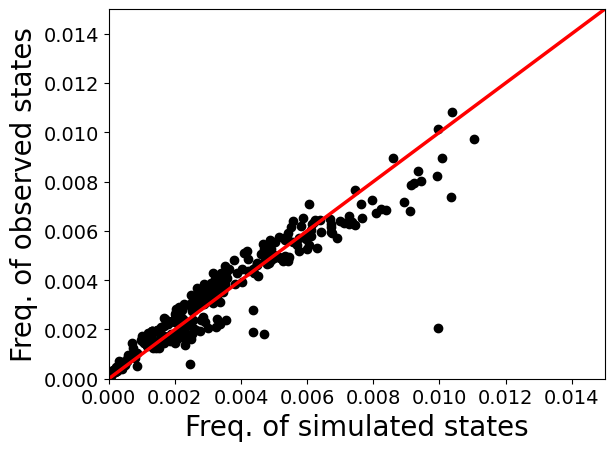

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure()
fig, ax = plt.subplots()
ax.scatter(grp_wts, grp_wts_target, color='k')
ax.plot([0, 1], [0, 1], 'r-', transform=ax.transAxes, linewidth=2.5)
plt.xlim([0, 0.015])
plt.ylim([0, 0.015])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Freq. of simulated states', fontsize=20)
plt.ylabel('Freq. of observed states', fontsize=20)
plt.savefig("../Figures/Toy_wind/state_comparison_toy_wind.eps", bbox_inches="tight")

In [6]:
from utils.simulation import reshape_3d_to_2d

# Load the observed and simulation data
amount = torch.load('../data/Toy_wind/wind_data_amount.pt')
amount_Dl = torch.load('../data/Toy_wind/amount_Dl_test_wind_12_24_Informer_Toy_Wind_ng300_sl48_ll48_pl48_dm512_nh8_el4_dl4_df2048_fc7_dtexp_0.pt')
amount_Chol = torch.load('../data/Toy_wind/amount_Chol_test_wind_12_24_Informer_Toy_Wind_ng300_sl48_ll48_pl48_dm512_nh8_el4_dl4_df2048_fc7_dtexp_0.pt')
amount_Rshfl = torch.load('../data/Toy_wind/amount_Rshfl_test_wind_12_24_Informer_Toy_Wind_ng300_sl48_ll48_pl48_dm512_nh8_el4_dl4_df2048_fc7_dtexp_0.pt')

Step 3: Check the spatial correlation matrix

In [7]:
# Reshape
amount = reshape_3d_to_2d(amount, out_type='numpy')
amount_Dl = reshape_3d_to_2d(amount_Dl, out_type='numpy')
amount_Rshfl = reshape_3d_to_2d(amount_Rshfl, out_type='numpy')

In [ ]:
# Calculate the spatial correlation matrix
c_amount = np.matmul(amount.T, amount) / amount.shape[0]
c_amount_Dl = np.matmul(amount_Dl.T, amount_Dl) / amount_Dl.shape[0]
c_amount_Chol = np.matmul(amount_Chol.T, amount_Chol) / amount_Chol.shape[0]
c_amount_Rshfl = np.matmul(amount_Rshfl.T, amount_Rshfl) / amount_Rshfl.shape[0]

print(c_amount)
print(c_amount_Dl)
print(c_amount_Chol)
print(c_amount_Rshfl)

[[1.00220865 0.71191055 0.60890295 0.68450026 0.68426592 0.67919916]
 [0.71191055 1.00582141 0.61301682 0.67978898 0.78088294 0.67239313]
 [0.60890295 0.61301682 1.00486725 0.68354779 0.62126971 0.59819491]
 [0.68450026 0.67978898 0.68354779 1.00436462 0.66993629 0.60298605]
 [0.68426592 0.78088294 0.62126971 0.66993629 1.00399435 0.72340024]
 [0.67919916 0.67239313 0.59819491 0.60298605 0.72340024 1.00045801]]
[[0.9278391  0.77268435 0.68504072 0.73690457 0.74117785 0.7387331 ]
 [0.77268435 0.94110979 0.68738665 0.74174073 0.83403747 0.74133233]
 [0.68504072 0.68738665 0.97607034 0.74143488 0.6874891  0.66635999]
 [0.73690457 0.74174073 0.74143488 0.92172522 0.7206295  0.66385692]
 [0.74117785 0.83403747 0.6874891  0.7206295  0.92474385 0.76894667]
 [0.7387331  0.74133233 0.66635999 0.66385692 0.76894667 0.91210192]]
[[1.00313923 0.71176172 0.60679911 0.68339367 0.6836039  0.68028759]
 [0.71176172 1.00475459 0.60904781 0.67777419 0.77831705 0.6722152 ]
 [0.60679911 0.60904781 0.999857

In [ ]:
# Calculate the Frobenius norm errors
print(np.linalg.norm(c_amount - c_amount_Dl)/np.linalg.norm(c_amount))
print(np.linalg.norm(c_amount - c_amount_Chol)/np.linalg.norm(c_amount))
print(np.linalg.norm(c_amount - c_amount_Rshfl)/np.linalg.norm(c_amount))

0.08621721511486458
0.0030516131410285026
0.00720050692174964


In [ ]:
0.08621720198338746 / 0.00720039858729858

11.973948516610402

Step 4: Compare the marginal distributions

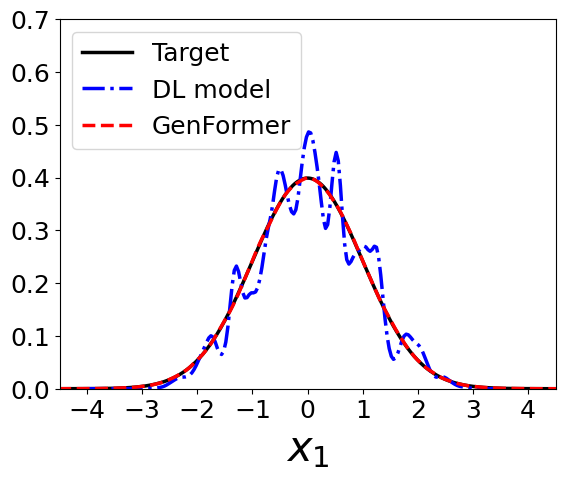

In [ ]:
# Marginal distribution plot: the last index 0 -> g1(t), 2 -> g3(t), 5 -> g6(t)
from scipy.stats import norm
import seaborn as sns
%matplotlib inline

plt.figure()
plt.plot(np.arange(-4.5, 4.5, 0.01), norm.pdf(np.arange(-4.5, 4.5, 0.01)), 'k-', label='Target', linewidth=2.5)
sns.kdeplot(amount_Dl[:, 0], color="b", ls='-.', lw=2.5, label='DL model')
sns.kdeplot(amount_Rshfl[:, 0], color="r", ls='--', lw=2.5, label='GenFormer')
plt.xlim([-4.5, 4.5])
plt.ylim([0, 0.7])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)
plt.xlabel(r'$x_1$', fontsize=30)
plt.ylabel('', fontsize=18)
plt.savefig("../Figures/Toy_wind/density_g1_wind.eps", bbox_inches="tight")

In [ ]:
from scipy.stats import norm
base = np.arange(-4, 4, 0.01)
d_target = norm.pdf((base[:-1] + base[1:]) / 2)
e_dl = []
e_rshfl = []
for k in range(6):
  d_dl, _ = np.histogram(amount_Dl[:, k], bins=base, density=True)
  d_rshfl, _ = np.histogram(amount_Rshfl[:, k], bins=base, density=True)
  e_dl.append(np.linalg.norm(d_dl - d_target, ord=1) / np.linalg.norm(d_target, ord=1))
  e_rshfl.append(np.linalg.norm(d_rshfl - d_target, ord=1) / np.linalg.norm(d_target, ord=1))

In [ ]:
print(np.mean(e_dl))
print(np.mean(e_rshfl))

0.17564407487531755
0.015738123418361883


In [ ]:
17.56 / 1.57

11.184713375796177

Step 5: Calculate the auto-correlation functions

In [8]:
from utils.simulation import estimate_cor

cor_tar = estimate_cor(amount, 192)
cor_Dl = estimate_cor(amount_Dl, 1920)
cor_Rshfl = estimate_cor(amount_Rshfl, 1920)

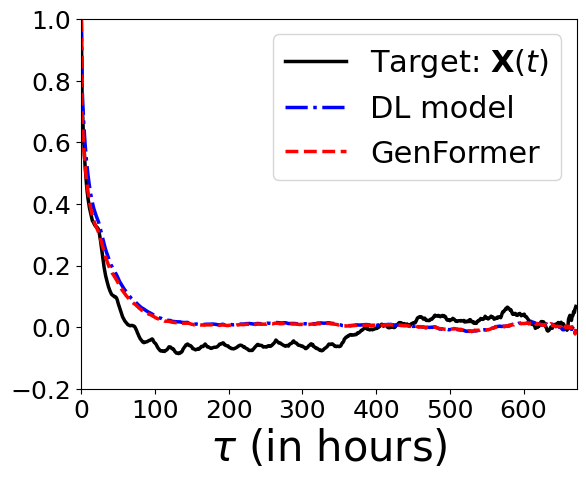

In [11]:
# Correlation function plot: the last index 0 -> g1(t), 2 -> g3(t), 5 -> g6(t)

%matplotlib inline
plt.figure()
plt.plot(np.arange(0, 672, 1), cor_tar[:, 5], 'k-', label=r'Target: $\mathbf{X}(t)$', linewidth=2.5)
plt.plot(np.arange(0, 672, 1), cor_Dl[:, 5], 'b-.', label='DL model', linewidth=2.5)
plt.plot(np.arange(0, 672, 1), cor_Rshfl[:, 5], 'r--', label='GenFormer', linewidth=2.5)
plt.xlim([-1, 672])
plt.ylim([-0.2, 1])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=22)
plt.xlabel(r'$\tau$ (in hours)', fontsize=30)
plt.savefig("../Figures/Toy_wind/cor_function_g6_wind.eps", bbox_inches="tight")

Step 6: Visualize the time series

In [ ]:
amount_Rshfl = torch.load('../data/Toy_wind/amount_Rshfl_test_wind_12_24_Informer_Toy_Wind_ng300_sl48_ll48_pl48_dm512_nh8_el4_dl4_df2048_fc7_dtexp_0.pt')

In [ ]:
from dateutil.relativedelta import relativedelta

t = time_real[190, :, 0]
t = [datetime.strptime(x, date_format) + relativedelta(years=2) for x in t]
t_min = min(t)
t_max = max(t)

<Figure size 640x480 with 0 Axes>

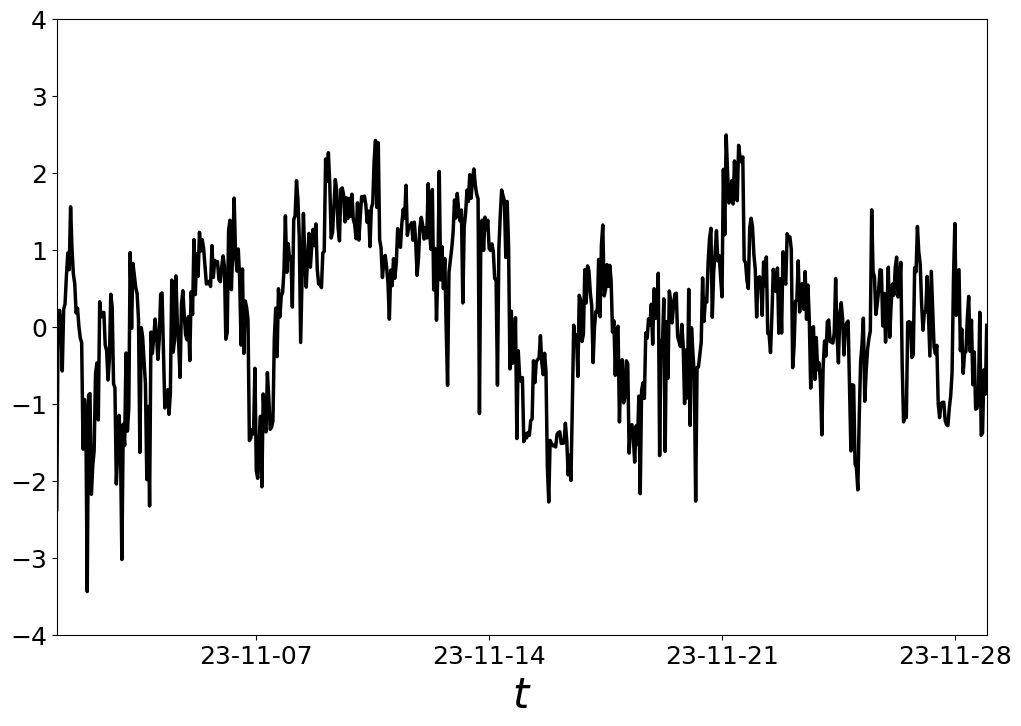

In [ ]:
# Generated time series plot: the last index 0 -> g1(t), 2 -> g3(t), 5 -> g6(t)
%matplotlib inline
plt.figure()
date_format = '%Y-%m-%dT%H:%M:%SZ'
pred = amount_Rshfl[190, :, 0]

%matplotlib inline
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(t, pred, 'k-', label='Model', linewidth=2.5)
date_form = DateFormatter("%y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.xlim([t_min, t_max])
plt.ylim([-4, 4])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('$t$', fontsize=30)
plt.savefig("../Figures/Toy_wind/data_sample_g1_wind.eps", bbox_inches="tight")

Step 7: Calculate the exceedance probability of quantity of interest

In [9]:
amount = torch.load('../data/Toy_wind/wind_data_amount.pt')
amount_Dl = torch.load('../data/Toy_wind/amount_Dl_test_wind_12_24_Informer_Toy_Wind_ng300_sl48_ll48_pl48_dm512_nh8_el4_dl4_df2048_fc7_dtexp_0.pt')
amount_Rshfl = torch.load('../data/Toy_wind/amount_Rshfl_test_wind_12_24_Informer_Toy_Wind_ng300_sl48_ll48_pl48_dm512_nh8_el4_dl4_df2048_fc7_dtexp_0.pt')

In [10]:
metric_tar = torch.zeros(192, 24, 28, 6)
for k in range(28):
  metric_tar[:, :, k, :] = amount[:, 24*k:24*(k+1), :]

metric_tar = torch.max(torch.mean(metric_tar, dim=1), dim=2)[0]

In [11]:
metric_Dl = torch.zeros(1920, 24, 28, 6)
for k in range(28):
  metric_Dl[:, :, k, :] = amount_Dl[:, 24*k:24*(k+1), :]

metric_Dl = torch.max(torch.mean(metric_Dl, dim=1), dim=2)[0]

metric_Rshfl = torch.zeros(1920, 24, 28, 6)
for k in range(28):
  metric_Rshfl[:, :, k, :] = amount_Rshfl[:, 24*k:24*(k+1), :]

metric_Rshfl = torch.max(torch.mean(metric_Rshfl, dim=1), dim=2)[0]

In [12]:
amount_reshape = torch.zeros(192, 24, 28, 6)
for k in range(28):
  amount_reshape[:, :, k, :] = amount[:, 24*k:24*(k+1), :]

In [13]:
cor_trans = np.zeros((24 * 6, 24 * 6))
for k in range(24):
  for l in range(24):
    for i in range(6):
      for j in range(6):
        lag = np.absolute(k - l)
        cor_trans[6 * k + i, 6 * l + j] = np.corrcoef(amount_reshape[:, lag:, :, i].flatten(), amount_reshape[:, :(24-lag), :, j].flatten())[0, 1]

In [14]:
from scipy.stats import norm, gamma

g_trans = np.random.multivariate_normal(np.zeros(144), cor_trans, 100000)

In [15]:
g_trans = torch.from_numpy(g_trans)
metric_trans = torch.zeros(100000, 24, 6)
for k in range(24):
  metric_trans[:, k, :] = g_trans[:, 6*k:6*(k+1)]

In [16]:
metric_trans = torch.max(torch.mean(metric_trans, dim=1), dim=1)[0]

In [17]:
from utils.simulation import ecdf

metric_tar = torch.flatten(metric_tar)
metric_Dl = torch.flatten(metric_Dl)
metric_Rshfl = torch.flatten(metric_Rshfl)
metric_trans = torch.flatten(metric_trans)
tar_cdf = ecdf(metric_tar)
dl_cdf = ecdf(metric_Dl)
rshfl_cdf = ecdf(metric_Rshfl)
trans_cdf = ecdf(metric_trans)

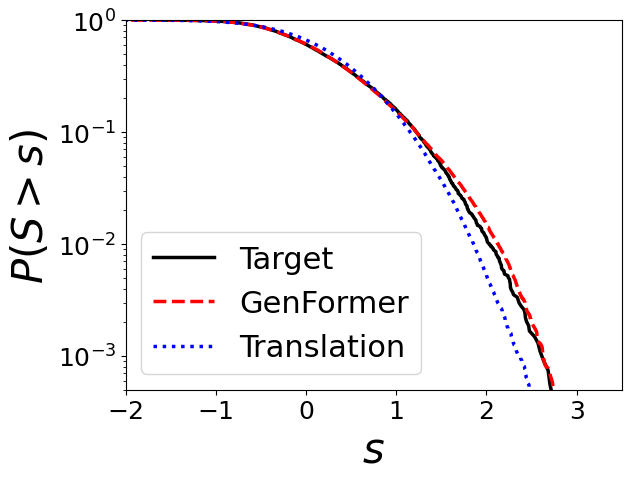

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure()
plt.plot(tar_cdf[0], 1 - tar_cdf[1], 'k-', label='Target', linewidth=2.5)
plt.plot(rshfl_cdf[0], 1 - rshfl_cdf[1], 'r--', label='GenFormer', linewidth=2.5)
plt.plot(trans_cdf[0], 1 - trans_cdf[1], 'b:', label='Translation', linewidth=2.5)
plt.yscale("log")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([5e-4, 1])
plt.xlim([-2, 3.5])
plt.legend(fontsize=22)
plt.xlabel(r'$s$', fontsize=30)
plt.ylabel(r'$P(S > s)$', fontsize=30)
plt.savefig("../Figures/Toy_wind/exceedance_probability_avemax.eps", bbox_inches="tight")

In [ ]:
def ep_error(cdf1, cdf2, threshold_p_lower=2e-3, threshold_p_upper=1):
  threshold_x_lower = np.interp(1 - threshold_p_lower, cdf1[1], cdf1[0])
  threshold_x_upper = np.interp(1 - threshold_p_upper, cdf1[1], cdf1[0])

  base = cdf1[0]
  base = base[(base <= threshold_x_lower) & (base >= threshold_x_upper)]
  ep1 = 1 - np.interp(base, cdf1[0], cdf1[1])
  ep2 = 1 - np.interp(base, cdf2[0], cdf2[1])

  return np.linalg.norm((1/ep1 - 1/ep2), ord=1) / np.linalg.norm(1/ep1, ord=1)

In [ ]:
# Calculate the Frobenius norm errors
print(ep_error(tar_cdf, dl_cdf, threshold_p_lower=5e-4))
print(ep_error(tar_cdf, rshfl_cdf, threshold_p_lower=5e-4))
print(ep_error(tar_cdf, trans_cdf, threshold_p_lower=5e-4))

0.39264324225841624
0.12816662838387444
0.9712652979865322


In [ ]:
0.9713 / 0.1281

7.582357533177206

In [24]:
rp_tar = 1/(1 - np.interp(2.7, tar_cdf[0], tar_cdf[1]))
rp_rshfl = 1/(1 - np.interp(2.7, rshfl_cdf[0], rshfl_cdf[1]))
rp_trans = 1/(1 - np.interp(2.7, trans_cdf[0], trans_cdf[1]))

print(rp_tar)
print(rp_rshfl)
print(rp_trans)

1683.5612781659386
1375.618430609644
6087.506530090145


In [25]:
np.abs(rp_tar - rp_trans)/np.abs(rp_tar - rp_rshfl)

14.30117726997744